# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [343]:
import os
import pandas as pd
import numpy as np
import re
PUIdata = os.getenv('PUIDATA')
dfData = os.getenv("DFDATA")


In [344]:
# Load dataset

# location of 311 data in data facility
dataLoc = dfData + "/erm2-nwe9/1446832678/erm2-nwe9"

# Read data into dataframe, first million rows only
df = pd.read_csv(dataLoc, nrows=1000000)
print df.columns
df.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,18,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
len(df)

1000000

In [346]:
# Download other two data files and move to PUIdata directory
!curl -O "http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv"
!curl -O "http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv"

os.system("mv Final_Demographics.csv ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv " + PUIdata)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59703  100 59703    0     0  8589k      0 --:--:-- --:--:-- --:--:-- 14.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14673  100 14673    0     0  2659k      0 --:--:-- --:--:-- --:--:-- 7164k


0

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [347]:
# Check if all Boroughs and Community Districts are represented in the Data 

In [348]:
# How many unique values do we have?
cds = df['Community Board'].unique()
cds = np.sort(cds)
print cds
print "\nUnique values: " + str(len(df['Community Board'].unique()))

['0 Unspecified' '01 BRONX' '01 BROOKLYN' '01 MANHATTAN' '01 QUEENS'
 '01 STATEN ISLAND' '02 BRONX' '02 BROOKLYN' '02 MANHATTAN' '02 QUEENS'
 '02 STATEN ISLAND' '03 BRONX' '03 BROOKLYN' '03 MANHATTAN' '03 QUEENS'
 '03 STATEN ISLAND' '04 BRONX' '04 BROOKLYN' '04 MANHATTAN' '04 QUEENS'
 '05 BRONX' '05 BROOKLYN' '05 MANHATTAN' '05 QUEENS' '06 BRONX'
 '06 BROOKLYN' '06 MANHATTAN' '06 QUEENS' '07 BRONX' '07 BROOKLYN'
 '07 MANHATTAN' '07 QUEENS' '08 BRONX' '08 BROOKLYN' '08 MANHATTAN'
 '08 QUEENS' '09 BRONX' '09 BROOKLYN' '09 MANHATTAN' '09 QUEENS' '10 BRONX'
 '10 BROOKLYN' '10 MANHATTAN' '10 QUEENS' '11 BRONX' '11 BROOKLYN'
 '11 MANHATTAN' '11 QUEENS' '12 BRONX' '12 BROOKLYN' '12 MANHATTAN'
 '12 QUEENS' '13 BROOKLYN' '13 QUEENS' '14 BROOKLYN' '14 QUEENS'
 '15 BROOKLYN' '16 BROOKLYN' '17 BROOKLYN' '18 BROOKLYN' '26 BRONX'
 '27 BRONX' '28 BRONX' '55 BROOKLYN' '56 BROOKLYN' '64 MANHATTAN'
 '80 QUEENS' '81 QUEENS' '82 QUEENS' '83 QUEENS' '84 QUEENS'
 '95 STATEN ISLAND' 'Unspecified BRONX' 'Unsp

In [349]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

In [350]:
cds_cut = cds[1:60]
print cds_cut
len(cds_cut)

['01 BRONX' '01 BROOKLYN' '01 MANHATTAN' '01 QUEENS' '01 STATEN ISLAND'
 '02 BRONX' '02 BROOKLYN' '02 MANHATTAN' '02 QUEENS' '02 STATEN ISLAND'
 '03 BRONX' '03 BROOKLYN' '03 MANHATTAN' '03 QUEENS' '03 STATEN ISLAND'
 '04 BRONX' '04 BROOKLYN' '04 MANHATTAN' '04 QUEENS' '05 BRONX'
 '05 BROOKLYN' '05 MANHATTAN' '05 QUEENS' '06 BRONX' '06 BROOKLYN'
 '06 MANHATTAN' '06 QUEENS' '07 BRONX' '07 BROOKLYN' '07 MANHATTAN'
 '07 QUEENS' '08 BRONX' '08 BROOKLYN' '08 MANHATTAN' '08 QUEENS' '09 BRONX'
 '09 BROOKLYN' '09 MANHATTAN' '09 QUEENS' '10 BRONX' '10 BROOKLYN'
 '10 MANHATTAN' '10 QUEENS' '11 BRONX' '11 BROOKLYN' '11 MANHATTAN'
 '11 QUEENS' '12 BRONX' '12 BROOKLYN' '12 MANHATTAN' '12 QUEENS'
 '13 BROOKLYN' '13 QUEENS' '14 BROOKLYN' '14 QUEENS' '15 BROOKLYN'
 '16 BROOKLYN' '17 BROOKLYN' '18 BROOKLYN']


59

In [352]:
# Check for duplicates? Are these plausible?
# print duplicate rows
df[df.duplicated()].head()

# no duplicates in first million rows...

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [381]:
# What about missing values? Can you detect any patterns? 
df_cut = df.loc[:, 'Unique Key':'Borough']
df_cut.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,INTERSECTION,BROOKLYN,NaN,NaN,Open,NaN,NaN,11/05/2015 02:59:15 AM,13 BROOKLYN,BROOKLYN
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 02:10:47 AM,Your comments have been submitted to the Mayor...,NaN,0 Unspecified,Unspecified
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,ADDRESS,BROOKLYN,NaN,NaN,Open,12/05/2015 02:06:51 AM,The Department of Parks and Recreation usually...,NaN,18 BROOKLYN,BROOKLYN
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,ADDRESS,BROOKLYN,NaN,Precinct,Assigned,11/05/2015 10:02:20 AM,Your complaint has been received by the Police...,11/05/2015 02:07:18 AM,12 BROOKLYN,BROOKLYN
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,Closed,NaN,The Human Resources Administration received yo...,NaN,0 Unspecified,Unspecified
5,31914148,11/05/2015 01:55:55 AM,NaN,DOT,Department of Transportation,Highway Condition,Pothole - Highway,Highway,10304,NaN,...,NaN,STATEN ISLAND,NaN,NaN,Open,11/15/2015 01:55:55 AM,The Department of Transportation requires 10 d...,NaN,02 STATEN ISLAND,STATEN ISLAND
6,31912764,11/05/2015 01:55:37 AM,NaN,DPR,DPR,Agency Issues,New Tree Complaint,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 01:59:29 AM,Your comments have been submitted to the Depar...,NaN,0 Unspecified,Unspecified
7,31912611,11/05/2015 01:47:12 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10021,1402 2 AVENUE,...,ADDRESS,NEW YORK,NaN,Precinct,Open,11/05/2015 09:47:12 AM,Your complaint has been forwarded to the New Y...,NaN,08 MANHATTAN,MANHATTAN
8,31913909,11/05/2015 01:39:31 AM,11/05/2015 02:35:44 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11231,273 SMITH STREET,...,ADDRESS,BROOKLYN,NaN,Precinct,Closed,11/05/2015 09:39:31 AM,The Police Department responded to the complai...,11/05/2015 02:33:52 AM,06 BROOKLYN,BROOKLYN
9,31914856,11/05/2015 01:38:35 AM,11/05/2015 02:33:33 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11231,273 SMITH STREET,...,ADDRESS,BROOKLYN,NaN,Precinct,Closed,11/05/2015 09:38:35 AM,The Police Department responded to the complai...,11/05/2015 02:28:24 AM,06 BROOKLYN,BROOKLYN


There seem to be lots of NaN values where 'Borough' is unspecified or erroneous.

In [382]:
df_cut[df_cut['Borough'] == 'Unspecified'].head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 02:10:47 AM,Your comments have been submitted to the Mayor...,NaN,0 Unspecified,Unspecified
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,Closed,NaN,The Human Resources Administration received yo...,NaN,0 Unspecified,Unspecified
6,31912764,11/05/2015 01:55:37 AM,NaN,DPR,DPR,Agency Issues,New Tree Complaint,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 01:59:29 AM,Your comments have been submitted to the Depar...,NaN,0 Unspecified,Unspecified
70,31912598,11/05/2015 12:10:22 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 12:10:26 AM,Your comments have been submitted to the Mayor...,NaN,0 Unspecified,Unspecified
72,31911630,11/05/2015 12:09:21 AM,NaN,CHALL,CHALL,Opinion for the Mayor,PUBLICSAFETY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 12:10:24 AM,Your comments have been submitted to the Mayor...,NaN,0 Unspecified,Unspecified
85,31909286,11/05/2015 12:01:18 AM,NaN,DSNY,Commissioner - EC,Agency Issues,Enforcement Issue,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Open,11/19/2015 12:07:58 AM,Your comments have been submitted to the Depar...,NaN,0 Unspecified,Unspecified
150,31908140,11/04/2015 11:24:32 PM,11/04/2015 11:25:08 PM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Cash Assistance,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,Closed,NaN,The Human Resources Administration received yo...,NaN,0 Unspecified,Unspecified
292,31908139,11/04/2015 10:34:34 PM,11/04/2015 10:35:29 PM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,Address Outside of NYC,NaN,NaN,...,NaN,NaN,NaN,NaN,Closed,NaN,The Human Resources Administration received yo...,NaN,0 Unspecified,Unspecified
390,31910532,11/04/2015 10:07:12 PM,11/04/2015 10:08:12 PM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Food Stamp,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,Closed,NaN,The Human Resources Administration received yo...,NaN,0 Unspecified,Unspecified
454,31913191,11/04/2015 09:47:58 PM,NaN,NYPD,NYPD,Blocked Driveway,No Access,Street/Sidewalk,NaN,9101-9129 43RD AVE,...,NaN,NaN,NaN,NaN,Unassigned,11/05/2015 05:47:58 AM,Your complaint has been forwarded to the New Y...,NaN,0 Unspecified,Unspecified


In [354]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

I don't know if it would make sense to use Complaint Type to fill missing values in Resolution Description, but it could possibly be used as some sort of proxy for missing values in the Descriptor column.

In [355]:
# Generate marker for unplausible Community Districts
# How do these districts look like?
print "Unplausible districts:"
print cds[60:]

marker = df_cut['Community Board'].isin(cds_cut)    
print marker.head(10)
df_cut[~marker].head(10)

Unplausible districts:
['26 BRONX' '27 BRONX' '28 BRONX' '55 BROOKLYN' '56 BROOKLYN'
 '64 MANHATTAN' '80 QUEENS' '81 QUEENS' '82 QUEENS' '83 QUEENS' '84 QUEENS'
 '95 STATEN ISLAND' 'Unspecified BRONX' 'Unspecified BROOKLYN'
 'Unspecified MANHATTAN' 'Unspecified QUEENS' 'Unspecified STATEN ISLAND']
0     True
1    False
2     True
3     True
4    False
5     True
6    False
7     True
8     True
9     True
Name: Community Board, dtype: bool


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 02:10:47 AM,Your comments have been submitted to the Mayor...,NaN,0 Unspecified,Unspecified
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,Closed,NaN,The Human Resources Administration received yo...,NaN,0 Unspecified,Unspecified
6,31912764,11/05/2015 01:55:37 AM,NaN,DPR,DPR,Agency Issues,New Tree Complaint,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 01:59:29 AM,Your comments have been submitted to the Depar...,NaN,0 Unspecified,Unspecified
70,31912598,11/05/2015 12:10:22 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 12:10:26 AM,Your comments have been submitted to the Mayor...,NaN,0 Unspecified,Unspecified
72,31911630,11/05/2015 12:09:21 AM,NaN,CHALL,CHALL,Opinion for the Mayor,PUBLICSAFETY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Email Sent,11/19/2015 12:10:24 AM,Your comments have been submitted to the Mayor...,NaN,0 Unspecified,Unspecified
85,31909286,11/05/2015 12:01:18 AM,NaN,DSNY,Commissioner - EC,Agency Issues,Enforcement Issue,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Open,11/19/2015 12:07:58 AM,Your comments have been submitted to the Depar...,NaN,0 Unspecified,Unspecified
150,31908140,11/04/2015 11:24:32 PM,11/04/2015 11:25:08 PM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Cash Assistance,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,Closed,NaN,The Human Resources Administration received yo...,NaN,0 Unspecified,Unspecified
218,31909187,11/04/2015 11:00:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,11101,JACKSON AVENUE,...,BLOCKFACE,Long Island City,NaN,NaN,Open,NaN,NaN,NaN,Unspecified QUEENS,QUEENS
231,31912053,11/04/2015 10:54:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,NaN,NaN,...,INTERSECTION,NaN,NaN,NaN,Open,NaN,NaN,NaN,Unspecified MANHATTAN,MANHATTAN
234,31915576,11/04/2015 10:51:00 PM,NaN,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,INTERSECTION,NaN,NaN,NaN,Open,NaN,NaN,NaN,Unspecified BROOKLYN,BROOKLYN


In [356]:
# Drop the marked districts
df_clean = df_cut[marker]
df_clean.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,INTERSECTION,BROOKLYN,NaN,NaN,Open,NaN,NaN,11/05/2015 02:59:15 AM,13 BROOKLYN,BROOKLYN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,ADDRESS,BROOKLYN,NaN,NaN,Open,12/05/2015 02:06:51 AM,The Department of Parks and Recreation usually...,NaN,18 BROOKLYN,BROOKLYN
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,ADDRESS,BROOKLYN,NaN,Precinct,Assigned,11/05/2015 10:02:20 AM,Your complaint has been received by the Police...,11/05/2015 02:07:18 AM,12 BROOKLYN,BROOKLYN
5,31914148,11/05/2015 01:55:55 AM,NaN,DOT,Department of Transportation,Highway Condition,Pothole - Highway,Highway,10304,NaN,...,NaN,STATEN ISLAND,NaN,NaN,Open,11/15/2015 01:55:55 AM,The Department of Transportation requires 10 d...,NaN,02 STATEN ISLAND,STATEN ISLAND
7,31912611,11/05/2015 01:47:12 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10021,1402 2 AVENUE,...,ADDRESS,NEW YORK,NaN,Precinct,Open,11/05/2015 09:47:12 AM,Your complaint has been forwarded to the New Y...,NaN,08 MANHATTAN,MANHATTAN
8,31913909,11/05/2015 01:39:31 AM,11/05/2015 02:35:44 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11231,273 SMITH STREET,...,ADDRESS,BROOKLYN,NaN,Precinct,Closed,11/05/2015 09:39:31 AM,The Police Department responded to the complai...,11/05/2015 02:33:52 AM,06 BROOKLYN,BROOKLYN
9,31914856,11/05/2015 01:38:35 AM,11/05/2015 02:33:33 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11231,273 SMITH STREET,...,ADDRESS,BROOKLYN,NaN,Precinct,Closed,11/05/2015 09:38:35 AM,The Police Department responded to the complai...,11/05/2015 02:28:24 AM,06 BROOKLYN,BROOKLYN
10,31911308,11/05/2015 01:37:14 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10465,279 PRENTISS AVENUE,...,ADDRESS,BRONX,NaN,Precinct,Open,11/05/2015 09:37:14 AM,Your complaint has been forwarded to the New Y...,NaN,10 BRONX,BRONX
11,31909392,11/05/2015 01:36:43 AM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,10022,850 3 AVENUE,...,ADDRESS,NEW YORK,NaN,NaN,Open,11/19/2015 01:36:43 AM,The Taxi and Limousine Commission will contact...,NaN,06 MANHATTAN,MANHATTAN
12,31912284,11/05/2015 01:30:36 AM,11/05/2015 02:13:35 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11221,23 CEDAR STREET,...,ADDRESS,BROOKLYN,NaN,Precinct,Closed,11/05/2015 09:30:36 AM,The Police Department issued a summons in resp...,11/05/2015 02:13:35 AM,04 BROOKLYN,BROOKLYN


In [357]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level

# Order districts by number of complaints
counts = df_clean['Community Board'].value_counts()
counts

12 MANHATTAN        32545
12 QUEENS           24370
01 BROOKLYN         24095
05 BROOKLYN         21971
07 QUEENS           21595
03 BROOKLYN         21563
01 QUEENS           21121
04 BRONX            20354
01 STATEN ISLAND    20176
05 QUEENS           19925
17 BROOKLYN         19431
14 BROOKLYN         19321
18 BROOKLYN         18423
13 QUEENS           18126
03 MANHATTAN        17932
07 BRONX            17849
10 MANHATTAN        17348
07 MANHATTAN        17263
12 BRONX            17237
09 QUEENS           16921
08 MANHATTAN        16907
04 MANHATTAN        16810
05 MANHATTAN        16488
05 BRONX            16250
09 BRONX            16084
12 BROOKLYN         16017
09 MANHATTAN        15562
04 BROOKLYN         15444
03 STATEN ISLAND    15318
08 BROOKLYN         15289
02 BROOKLYN         15042
15 BROOKLYN         14846
11 BROOKLYN         14825
10 QUEENS           14813
02 MANHATTAN        14464
09 BROOKLYN         13868
03 QUEENS           13623
06 BROOKLYN         13231
08 QUEENS   

In [358]:
# Safe reduced data frame (Community District level)

# Create dataframe with ordered districts and their rank
df_reduced = pd.DataFrame(data=counts.index)
df_reduced.rename(columns={0: "Community District"}, inplace=True)
df_reduced['Rank'] = df_reduced.index + 1
df_reduced

,Community District,Rank
0,12 MANHATTAN,1
1,12 QUEENS,2
2,01 BROOKLYN,3
3,05 BROOKLYN,4
4,07 QUEENS,5
5,03 BROOKLYN,6
6,01 QUEENS,7
7,04 BRONX,8
8,01 STATEN ISLAND,9
9,05 QUEENS,10


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [359]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")
print len(df_pop)
df_pop.head()


59


,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [360]:
# Check variables in file
for i in df_pop.columns:
    print i

FIPS
cd_id
Total Population
Population Density (per sq. mile)
% Total Population: Male
% Total Population: 18 to 24 Years
% Total Population: 25 to 34 Years
% Total Population: 35 to 44 Years
% Population 5 Years And Over: Speak Only English
% Population 5 Years And Over: Spanish or Spanish Creole
% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"
% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"
Population 25 Years and over:
Population 25 Years and over: Less Than High School
Population 25 Years and over: High School Graduate (includes equivalency)
Population 25 Years and over: Some college
Population 25 Years and over: Bachelor's degree
Population 25 Years and over: Master's degree
Population 25 Years and over: Professional school degree
Population 25 Years and over: Doctorate degree
% Population 25 Years and over: Less Than High School
% Population 25 Years and over: High School Graduate (includes equivalen

In [361]:
# How many community districts are in file?
print str(len(df_pop.cd_id.unique())) + " community districts\n"
print df_pop.cd_id

59 community districts

0        BX08
1        BX12
2        BX10
3        BX11
4        BX03
5        BX06
6        BX07
7        BX05
8        BX04
9        BX09
10       BX01
11       BX02
12       MN12
13       MN09
14       MN10
15    MN11111
16       MN08
17       MN07
18       MN05
19       MN04
20       MN06
21       MN03
22       MN01
23       MN02
24       SI03
25       SI02
26       SI01
27       BK01
28       BK04
29       BK03
30       BK02
31       BK06
32       BK08
33       BK16
34       BK05
35       BK18
36       BK17
37       BK09
38       BK07
39       BK10
40       BK12
41       BK14
42       BK15
43       BK11
44       BK13
45       QN01
46       QN03
47       QN07
48       QN11
49       QN13
50       QN08
51       QN04
52       QN06
53       QN02
54       QN05
55       QN09
56       QN12
57       QN10
58       QN14
Name: cd_id, dtype: object


In [362]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

# Create list of columns to keep
cols = []
for i in df_pop.columns:
    if i[0] != '%':
        cols.append(i)
cols2 = cols[0:12]
cols3 = cols[55:71]
cols = cols2 + cols3
cols

['FIPS',
 'cd_id',
 'Total Population',
 'Population Density (per sq. mile)',
 'Population 25 Years and over:',
 'Population 25 Years and over: Less Than High School',
 'Population 25 Years and over: High School Graduate (includes equivalency)',
 'Population 25 Years and over: Some college',
 "Population 25 Years and over: Bachelor's degree",
 "Population 25 Years and over: Master's degree",
 'Population 25 Years and over: Professional school degree',
 'Population 25 Years and over: Doctorate degree',
 'Households: Less than $10,000',
 'Households: $10,000 to $14,999',
 'Households: $15,000 to $19,999',
 'Households: $20,000 to $24,999',
 'Households: $25,000 to $29,999',
 'Households: $30,000 to $34,999',
 'Households: $35,000 to $39,999',
 'Households: $40,000 to $44,999',
 'Households: $45,000 to $49,999',
 'Households: $50,000 to $59,999',
 'Households: $60,000 to $74,999',
 'Households: $75,000 to $99,999',
 'Households: $100,000 to $124,999',
 'Households: $125,000 to $149,999',


In [363]:
# Save data frame
df_pop_cut = df_pop[cols]
df_pop_cut.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),Population 25 Years and over:,Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,Population 25 Years and over: Master's degree,...,"Households: $35,000 to $39,999","Households: $40,000 to $44,999","Households: $45,000 to $49,999","Households: $50,000 to $59,999","Households: $60,000 to $74,999","Households: $75,000 to $99,999","Households: $100,000 to $124,999","Households: $125,000 to $149,999","Households: $150,000 to $199,999","Households: $200,000 or More"
0,3603701,BX08,106737,31229.95006,71928,12176,13847,17228,15256,8216,...,2063,1601,1087,2733,3695,6179,3797,2091,1760,2149
1,3603702,BX12,134644,19966.67839,88219,17450,27572,22515,15216,5253,...,3268,1748,1962,4130,3920,4682,2940,2051,1516,1194
2,3603703,BX10,121209,12913.81703,85902,14898,25702,21961,14382,7598,...,2225,2862,1761,3483,5141,6981,3219,3129,1934,1794
3,3603704,BX11,135839,35677.95453,93326,21317,26208,23301,12326,7006,...,1709,2458,1899,3514,4326,5298,3273,1463,2624,1076
4,3603705,BX03,172247,39405.79222,98478,37438,26090,23256,7913,2544,...,3266,2740,1336,3965,3141,2330,1568,810,323,295


In [364]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [365]:
# Check variables in file
df_infr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [366]:
# How many community districts are in file? 
print str(len(df_infr['Qualifying Name'].unique())) + ' community districts'

55 community districts


In [367]:
# Get an idea for what values look like in all columns
df_infr.iloc[0, :]

FIPS                                                                                                 3603701
Geographic Identifier                                                                         79500US3603701
Qualifying Name                                            NYC-Bronx Community District 8--Riverdale, New...
Households                                                                                             42035
Households: With An Internet Subscription                                                              31795
Households: Dial-Up Alone                                                                                444
Households: Dsl                                                                                         2813
Households: With Mobile Broadband                                                                        946
Households: Without Mobile Broadband                                                                    1867
Households: Cable M

In [368]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

df_infr['Total With Mobile Broadband'] = df_infr[['Households: With Mobile Broadband', 'Households: With Mobile Broadband.1',
                                                'Households: With Mobile Broadband.2', 'Households: With Mobile Broadband.3',
                                                'Households: With Mobile Broadband.4']].sum(axis=1)

df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,Total With Mobile Broadband
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2119,8121,75.64,42035,35048,404,30943,3701,6987,15359
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,1891,10696,71.92,44830,36700,178,31435,5087,8130,10486
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,2882,11439,69.56,47050,38700,158,32333,6209,8350,11425
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,2722,10197,71.24,44922,37237,122,31278,5837,7685,10748
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,3312,18741,61.68,57556,42576,88,33408,9080,14980,14907


In [369]:
# Aggregate internet type by high and low connections
df_infr['Total High Speed'] = df_infr[['Households: Cable Modem', 'Households: Fiber-Optic',
                                                'Households: Two or More Fixed Broadband Types, or Other', 
                                                'Households: With A Broadband Internet Subscription',
                                                'Households: Dsl']].sum(axis=1)

df_infr['Total Low Speed'] = df_infr[['Households: Dial-Up Alone', 'Households: With Dial-Up Internet Subscription Alone',
                                                'Households: No Internet Access', 'Households: Without An Internet Subscription',
                                                'Households: With Mobile Broadband.4']].sum(axis=1)

In [370]:
# Save data frame 
df_infr_cut = df_infr[['Qualifying Name', 'Total With Mobile Broadband', 'Total High Speed', 'Total Low Speed']]
df_infr_cut.head()

,Qualifying Name,Total With Mobile Broadband,Total High Speed,Total Low Speed
0,"NYC-Bronx Community District 8--Riverdale, New...",15359,60051,16180
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10486,62441,18285
2,"NYC-Bronx Community District 10--Co-op City, N...",11425,64265,21414
3,NYC-Bronx Community District 11--Pelham Parkwa...,10748,61831,18434
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14907,67244,34757


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [371]:
# Harmonize identifier of dataframe 1
def reformat(x):
    codes = {'BROOKLYN':'BK','QUEENS':'QN','BRONX':'BX','MANHATTAN':'MN','STATEN ISLAND':'SI'}
    for i in codes.keys():
        if i in x:
            x = codes[i] + x[:2]
            return x

df_reduced['Community District'] = df_reduced['Community District'].map(reformat)
df_reduced.head()

,Community District,Rank
0,MN12,1
1,QN12,2
2,BK01,3
3,BK05,4
4,QN07,5


In [372]:
# Harmonize identifier of dataframe 2
df_pop_cut.cd_id[15] = 'MN11'
df_pop_cut.cd_id[15]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


'MN11'

In [373]:
# Harmonize identifier of dataframe 3
import re

def regexformat(x):
    num = re.findall(r'\d+', x)[0]
    if len(num) != 2:
        num = '0' + num[0]
    codes = {'Brooklyn':'BK','Queens':'QN','Bronx':'BX','Manhattan':'MN','Staten Island':'SI'}
    for i in codes.keys():
        if i in x:
            x = codes[i] + num
            return x

df_infr_cut['Qualifying Name'].astype(str, copy=False)
regexformat('NYC-Bronx Community District 11--Pelham Parkwa')    
df_infr_cut['Qualifying Name'] = df_infr_cut['Qualifying Name'].map(regexformat)
df_infr_cut.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Qualifying Name,Total With Mobile Broadband,Total High Speed,Total Low Speed
0,BX08,15359,60051,16180
1,BX12,10486,62441,18285
2,BX10,11425,64265,21414
3,BX11,10748,61831,18434
4,BX03,14907,67244,34757


In [374]:
# Link the 3 dataframes
# print len(df_infr_cut), len(df_reduced), len(df_pop_cut)
df_infr_cut.rename(columns={'Qualifying Name': "Community District"}, inplace=True)
df_pop_cut.rename(columns={'cd_id': "Community District"}, inplace=True)

df_merge = df_reduced.merge(df_pop_cut, on='Community District')
df_merge = df_merge.merge(df_infr_cut, on='Community District')
df_merge.head()

,Community District,Rank,FIPS,Total Population,Population Density (per sq. mile),Population 25 Years and over:,Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,...,"Households: $50,000 to $59,999","Households: $60,000 to $74,999","Households: $75,000 to $99,999","Households: $100,000 to $124,999","Households: $125,000 to $149,999","Households: $150,000 to $199,999","Households: $200,000 or More",Total With Mobile Broadband,Total High Speed,Total Low Speed
0,MN12,1,3603801,224365,75217.43287,156990,46865,29587,32989,27972,...,6608,7364,9473,4252,2553,2226,2376,22019,106660,24331
1,QN12,2,3604112,251002,27089.67720,164402,30662,52322,45853,24353,...,7700,6754,8756,5993,4590,4795,1902,9148,99044,31328
2,BK01,3,3604001,154713,37671.51058,109377,18483,18437,18226,37203,...,3840,5326,7128,5501,3709,4191,5084,19516,90620,22461
3,BK05,4,3604008,155863,26394.76469,99130,22685,41138,20340,10426,...,3760,4788,4630,2759,1023,1400,634,8092,72215,22423
4,QN07,5,3604103,256742,21836.66849,191003,39569,60603,43663,29613,...,5256,8522,10244,7996,4103,6480,3311,21980,134338,25262


In [375]:
df_merge.columns

Index([u'Community District', u'Rank', u'FIPS', u'Total Population',
       u'Population Density (per sq. mile)', u'Population 25 Years and over:',
       u'Population 25 Years and over: Less Than High School',
       u'Population 25 Years and over: High School Graduate (includes equivalency)',
       u'Population 25 Years and over: Some college',
       u'Population 25 Years and over: Bachelor's degree',
       u'Population 25 Years and over: Master's degree',
       u'Population 25 Years and over: Professional school degree',
       u'Population 25 Years and over: Doctorate degree',
       u'Households: Less than $10,000', u'Households: $10,000 to $14,999',
       u'Households: $15,000 to $19,999', u'Households: $20,000 to $24,999',
       u'Households: $25,000 to $29,999', u'Households: $30,000 to $34,999',
       u'Households: $35,000 to $39,999', u'Households: $40,000 to $44,999',
       u'Households: $45,000 to $49,999', u'Households: $50,000 to $59,999',
       u'Households: $60

In [376]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?

In [377]:
# Aggregate data for education level and income level

df_merge['Bachelors or More'] = df_merge[["Population 25 Years and over: Bachelor's degree", 
    "Population 25 Years and over: Master's degree",
    'Population 25 Years and over: Professional school degree',
    'Population 25 Years and over: Doctorate degree']].sum(axis=1)

df_merge['100K or More'] = df_merge[["Population 25 Years and over: Bachelor's degree",
 "Population 25 Years and over: Master's degree",
 'Population 25 Years and over: Professional school degree',
 'Population 25 Years and over: Doctorate degree']].sum(axis=1)

df_merge.head()

,Community District,Rank,FIPS,Total Population,Population Density (per sq. mile),Population 25 Years and over:,Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,...,"Households: $75,000 to $99,999","Households: $100,000 to $124,999","Households: $125,000 to $149,999","Households: $150,000 to $199,999","Households: $200,000 or More",Total With Mobile Broadband,Total High Speed,Total Low Speed,Bachelors or More,100K or More
0,MN12,1,3603801,224365,75217.43287,156990,46865,29587,32989,27972,...,9473,4252,2553,2226,2376,22019,106660,24331,47549,47549
1,QN12,2,3604112,251002,27089.67720,164402,30662,52322,45853,24353,...,8756,5993,4590,4795,1902,9148,99044,31328,35565,35565
2,BK01,3,3604001,154713,37671.51058,109377,18483,18437,18226,37203,...,7128,5501,3709,4191,5084,19516,90620,22461,54231,54231
3,BK05,4,3604008,155863,26394.76469,99130,22685,41138,20340,10426,...,4630,2759,1023,1400,634,8092,72215,22423,14967,14967
4,QN07,5,3604103,256742,21836.66849,191003,39569,60603,43663,29613,...,10244,7996,4103,6480,3311,21980,134338,25262,47168,47168


In [378]:
# Create ranking columns for mobile, income and college
df_merge['Mobile Broadband Rank'] = df_merge['Total With Mobile Broadband'].rank(ascending=False)
df_merge['Income Rank'] = df_merge['100K or More'].rank(ascending=False)
df_merge['College Rank'] = df_merge['Bachelors or More'].rank(ascending=False)
df_merge['Ranking Total'] = df_merge[['Mobile Broadband Rank','Income Rank','College Rank']].sum(axis=1)

# Rename column for ranking by number of complaints
df_merge.rename(columns={'Rank':'311 Rank'}, inplace=True)

df_merge.head()

,Community District,311 Rank,FIPS,Total Population,Population Density (per sq. mile),Population 25 Years and over:,Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,...,"Households: $200,000 or More",Total With Mobile Broadband,Total High Speed,Total Low Speed,Bachelors or More,100K or More,Mobile Broadband Rank,Income Rank,College Rank,Ranking Total
0,MN12,1,3603801,224365,75217.43287,156990,46865,29587,32989,27972,...,2376,22019,106660,24331,47549,47549,10.0,13.0,13.0,36.0
1,QN12,2,3604112,251002,27089.67720,164402,30662,52322,45853,24353,...,1902,9148,99044,31328,35565,35565,48.0,26.0,26.0,100.0
2,BK01,3,3604001,154713,37671.51058,109377,18483,18437,18226,37203,...,5084,19516,90620,22461,54231,54231,12.0,11.0,11.0,34.0
3,BK05,4,3604008,155863,26394.76469,99130,22685,41138,20340,10426,...,634,8092,72215,22423,14967,14967,55.0,52.0,52.0,159.0
4,QN07,5,3604103,256742,21836.66849,191003,39569,60603,43663,29613,...,3311,21980,134338,25262,47168,47168,11.0,14.0,14.0,39.0


In [379]:
# Show 311 rank alongside total of other rankings (lower number means higher combined levels of broadband/income)
df_merge[['Community District', '311 Rank', 'Ranking Total']]

,Community District,311 Rank,Ranking Total
0,MN12,1,36.0
1,QN12,2,100.0
2,BK01,3,34.0
3,BK05,4,159.0
4,QN07,5,39.0
5,BK03,6,131.0
6,QN01,7,26.0
7,BX04,8,124.0
8,SI01,9,100.0
9,QN05,10,111.0


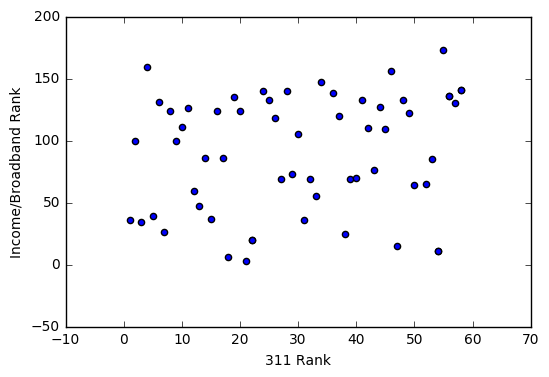

In [380]:
import pylab as pl

pl.scatter(df_merge['311 Rank'], df_merge['Ranking Total'])
pl.xlabel('311 Rank')
pl.ylabel('Income/Broadband Rank')
pl.show()

The plot shows minimal correlation between ranking by number of complaints and ranking by the other indicators, although our methods may be oversimplifying the data such that patterns are being lost.